## **MSc Major Research Project**

## **Exploring the effect of daytime physical activity on sleep quality**

Melania Czobit

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Daytime activity analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/MRP/FitbitActivity.csv'
df = pd.read_csv(path)
df

,egoid,datadate,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
0,44869,2015-07-28,91,86.669746,11.979352,4034.0,1.0,1034.0,149.0,2.0,12.0,1211,75,9,4,1364.19900,159.79671,61.841969,35.46954
1,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,0.0,1273,103,3,0,1322.14650,262.28818,11.997700,0.00000
2,44869,2015-07-30,100,83.281448,16.863153,3660.0,0.0,795.0,139.0,3.0,18.0,1267,109,15,16,1288.98170,232.89841,77.910057,127.26234
3,44869,2015-07-31,80,91.707787,12.464956,6016.0,13.0,954.0,259.0,0.0,0.0,846,295,2,0,954.04791,629.57526,2.224320,0.00000
4,44869,2015-08-01,78,101.268140,10.464320,9846.0,5.0,1078.0,282.0,24.0,8.0,628,502,0,0,702.88513,1080.83410,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357822,35925,2018-03-30,28,76.786240,11.834908,3951.0,3.0,1332.0,88.0,8.0,12.0,375,32,0,0,740.04407,174.29564,0.000000,0.00000
357823,35925,2018-03-31,56,82.338219,14.672435,14762.0,42.0,1163.0,167.0,49.0,61.0,674,145,0,0,1335.35630,910.30292,0.000000,0.00000
357824,35925,2018-04-01,58,78.426506,16.393349,13986.0,31.0,1132.0,198.0,58.0,52.0,694,136,0,0,1384.27310,849.63190,0.000000,0.00000
357825,35925,2018-04-02,48,89.128021,16.900349,19277.0,12.0,1090.0,168.0,82.0,100.0,483,218,2,0,1087.21060,1419.65470,20.659019,0.00000


In [ ]:
df['egoid'].nunique()

623

In [ ]:
df['datadate'] = pd.to_datetime(df['datadate'])
df = df.rename(columns={'datadate': 'date'})

In [ ]:
df = df[df.complypercent > 50]
df

,egoid,date,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
0,44869,2015-07-28,91,86.669746,11.979352,4034.0,1.0,1034.0,149.0,2.0,12.0,1211,75,9,4,1364.19900,159.79671,61.841969,35.46954
1,44869,2015-07-29,97,87.975342,8.990446,3702.0,0.0,769.0,153.0,0.0,0.0,1273,103,3,0,1322.14650,262.28818,11.997700,0.00000
2,44869,2015-07-30,100,83.281448,16.863153,3660.0,0.0,795.0,139.0,3.0,18.0,1267,109,15,16,1288.98170,232.89841,77.910057,127.26234
3,44869,2015-07-31,80,91.707787,12.464956,6016.0,13.0,954.0,259.0,0.0,0.0,846,295,2,0,954.04791,629.57526,2.224320,0.00000
4,44869,2015-08-01,78,101.268140,10.464320,9846.0,5.0,1078.0,282.0,24.0,8.0,628,502,0,0,702.88513,1080.83410,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357816,35925,2018-03-21,52,81.601875,13.875030,7381.0,11.0,1227.0,163.0,44.0,6.0,635,111,0,0,1181.83840,551.02594,0.000000,0.00000
357821,35925,2018-03-29,55,77.525253,13.391768,5754.0,7.0,1258.0,163.0,19.0,0.0,709,83,0,0,1219.71330,449.86798,0.000000,0.00000
357823,35925,2018-03-31,56,82.338219,14.672435,14762.0,42.0,1163.0,167.0,49.0,61.0,674,145,0,0,1335.35630,910.30292,0.000000,0.00000
357824,35925,2018-04-01,58,78.426506,16.393349,13986.0,31.0,1132.0,198.0,58.0,52.0,694,136,0,0,1384.27310,849.63190,0.000000,0.00000


In [ ]:
df = df[(df['date'] > '2015-07-31') & (df['date'] <= '2016-08-01')]

In [ ]:
df['egoid'].nunique()

591

In [ ]:
c = df.groupby('egoid').nunique()
c = c['date']
c = c.reset_index()
days = dict(zip(c.egoid, c.date))

remove = []
count=0
for key in days:
  # print(key, days[key])
  if days[key] > 300:
    count +=1
  else:
    remove.append(key)
print("individuals with over 300 days worth of data: ", count)

individuals with over 300 days worth of data:  125


In [ ]:
for id in remove:
  df = df[df.egoid != id]

In [ ]:
df['egoid'] = df['egoid'].astype('object')

In [ ]:
df.shape

(42735, 19)

In [ ]:
df['date'].nunique()

367

In [ ]:
df['egoid'].nunique()

125

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42735 entries, 4 to 355177
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   egoid                 42735 non-null  object        
 1   date                  42735 non-null  datetime64[ns]
 2   complypercent         42735 non-null  int64         
 3   meanrate              42735 non-null  float64       
 4   sdrate                42735 non-null  float64       
 5   steps                 42717 non-null  float64       
 6   floors                42301 non-null  float64       
 7   sedentaryminutes      41808 non-null  float64       
 8   lightlyactiveminutes  41808 non-null  float64       
 9   fairlyactiveminutes   42735 non-null  float64       
 10  veryactiveminutes     41808 non-null  float64       
 11  lowrangemins          42735 non-null  int64         
 12  fatburnmins           42735 non-null  int64         
 13  cardiomins     

In [ ]:
df.describe()

,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,321505.000000,321505.000000,321505.000000,321280.000000,320621.000000,319693.000000,319693.000000,321501.000000,319693.000000,321505.000000,321505.000000,321505.000000,321505.000000,321505.000000,321505.000000,321505.000000,321505.000000
mean,91.544212,73.559742,15.672297,11659.049163,18.202657,755.116981,216.121016,27.053739,33.174211,1183.229356,120.602367,4.339805,0.985801,1824.347954,595.294091,41.067245,11.190293
std,11.926858,8.779320,3.882635,5641.786866,19.672448,230.529804,90.905848,31.335273,36.756224,194.505156,104.519696,10.078055,4.543157,523.573700,515.626148,102.385164,54.836419
min,51.000000,43.987461,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,67.254585,12.909951,7695.000000,8.000000,621.000000,165.000000,6.000000,4.000000,1103.000000,46.000000,0.000000,0.000000,1459.607400,224.452800,0.000000,0.000000
50%,97.000000,73.189079,15.247651,11088.000000,14.000000,711.000000,213.000000,18.000000,23.000000,1242.000000,94.000000,0.000000,0.000000,1782.003800,471.572140,0.000000,0.000000
75%,98.000000,79.449814,18.047974,14851.000000,22.000000,814.000000,268.000000,37.000000,50.000000,1323.000000,164.000000,3.000000,0.000000,2167.358200,816.208070,27.846001,0.000000
max,100.000000,122.669340,60.860748,64226.000000,670.000000,1440.000000,937.000000,458.000000,650.000000,1440.000000,1344.000000,343.000000,428.000000,5644.347200,8111.299800,4543.892100,4822.670900


In [ ]:
df.isnull().sum()

egoid                      0
date                       0
complypercent              0
meanrate                   0
sdrate                     0
steps                    225
floors                   884
sedentaryminutes        1812
lightlyactiveminutes    1812
fairlyactiveminutes        4
veryactiveminutes       1812
lowrangemins               0
fatburnmins                0
cardiomins                 0
peakmins                   0
lowrangecal                0
fatburncal                 0
cardiocal                  0
peakcal                    0
dtype: int64

In [ ]:
df2 = df.copy() 
df2 = df2.set_index(['date'])

In [ ]:
# It was found that some indivuals have recorded values for the same given day
temp = df2[df2.egoid==23287]
print(temp.index.is_unique)
temp.loc['2015-08-13']

False


,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
date,,,,,,,,,,,,,,,,,,
2015-08-13,23287,98,52.676079,11.336383,7253.0,1.0,551.0,175.0,6.0,0.0,1346,0,0,0,2465.1897,0.0,0.0,0.0
2015-08-13,23287,98,52.676079,11.336383,7253.0,1.0,NaN,NaN,6.0,NaN,1346,0,0,0,2465.1897,0.0,0.0,0.0


In [ ]:
temp = temp.reset_index() # makes date column part of your data
temp = temp.drop_duplicates('date',keep='first').set_index('date')
print(temp.index.is_unique)
temp.loc['2015-08-13']

True


egoid                       23287
complypercent                  98
meanrate                52.676079
sdrate                  11.336383
steps                      7253.0
floors                        1.0
sedentaryminutes            551.0
lightlyactiveminutes        175.0
fairlyactiveminutes           6.0
veryactiveminutes             0.0
lowrangemins                 1346
fatburnmins                     0
cardiomins                      0
peakmins                        0
lowrangecal             2465.1897
fatburncal                    0.0
cardiocal                     0.0
peakcal                       0.0
Name: 2015-08-13 00:00:00, dtype: object

In [ ]:
# fill missing days 
ids = df2['egoid'].value_counts().index.to_list()

df3 = pd.DataFrame()
for i in ids:
  temp = df2[df2.egoid==i]
  # if (temp.index.is_unique == False):
  temp = temp.reset_index() # makes date column part of your data
  temp = temp.drop_duplicates('date',keep='first').set_index('date')
  new_date_range = pd.date_range(start="2015-07-31", end="2016-08-01", freq="D")
  temp = temp.reindex(new_date_range, fill_value= pd.NA)
  temp = temp.fillna(method='ffill')  
  # temp = temp.fillna(method='ffill')
  # temp = temp.resample('D').ffill()
  temp = temp.fillna(temp.mean())
  df3 = df3.append(temp)
df3.isnull().sum()

egoid                   0
complypercent           0
meanrate                0
sdrate                  0
steps                   0
floors                  0
sedentaryminutes        0
lightlyactiveminutes    0
fairlyactiveminutes     0
veryactiveminutes       0
lowrangemins            0
fatburnmins             0
cardiomins              0
peakmins                0
lowrangecal             0
fatburncal              0
cardiocal               0
peakcal                 0
dtype: int64

In [ ]:
df3

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
2015-07-31,67918.0,95.318801,81.306199,14.554995,10859.318801,21.027248,700.662125,213.316076,26.209809,16.400545,1188.580381,165.021798,1.591281,0.182561,1639.296066,644.114311,11.988228,1.849616
2015-08-01,67918.0,97.000000,80.455666,14.178942,11419.000000,10.000000,637.000000,217.000000,30.000000,15.000000,1235.000000,141.000000,0.000000,0.000000,1753.333300,546.373050,0.000000,0.000000
2015-08-02,67918.0,59.000000,93.715698,10.107015,9042.000000,10.000000,1174.000000,234.000000,26.000000,6.000000,607.000000,202.000000,0.000000,0.000000,1041.266400,647.560910,0.000000,0.000000
2015-08-03,67918.0,97.000000,77.604469,12.975431,6327.000000,6.000000,673.000000,175.000000,7.000000,7.000000,1317.000000,71.000000,0.000000,0.000000,1762.816400,280.429110,0.000000,0.000000
2015-08-04,67918.0,59.000000,90.791718,13.081469,13092.000000,18.000000,1118.000000,205.000000,35.000000,35.000000,689.000000,154.000000,2.000000,0.000000,1126.718500,703.730100,14.172560,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-28,36501.0,98.000000,50.556137,13.650418,5965.000000,6.000000,647.000000,183.000000,26.000000,16.000000,1308.000000,28.000000,0.000000,0.000000,2356.603800,215.021880,0.000000,0.000000
2016-07-29,36501.0,97.000000,52.905212,13.897326,8814.000000,34.000000,586.000000,244.000000,18.000000,18.000000,1249.000000,17.000000,0.000000,0.000000,2529.085200,150.180150,0.000000,0.000000
2016-07-30,36501.0,96.000000,49.838959,8.438036,4890.000000,11.000000,698.000000,248.000000,4.000000,5.000000,1299.000000,5.000000,0.000000,0.000000,2358.537400,41.251202,0.000000,0.000000
2016-07-31,36501.0,93.000000,52.419224,15.835029,10229.000000,7.000000,618.000000,225.000000,14.000000,50.000000,1188.000000,50.000000,0.000000,0.000000,2314.708000,462.529080,0.000000,0.000000


In [ ]:
df3 = df3[df3.index != '2015-07-31']
df3

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
2015-08-01,67918.0,97.0,80.455666,14.178942,11419.0,10.0,637.0,217.0,30.0,15.0,1235.0,141.0,0.0,0.0,1753.3333,546.373050,0.00000,0.0
2015-08-02,67918.0,59.0,93.715698,10.107015,9042.0,10.0,1174.0,234.0,26.0,6.0,607.0,202.0,0.0,0.0,1041.2664,647.560910,0.00000,0.0
2015-08-03,67918.0,97.0,77.604469,12.975431,6327.0,6.0,673.0,175.0,7.0,7.0,1317.0,71.0,0.0,0.0,1762.8164,280.429110,0.00000,0.0
2015-08-04,67918.0,59.0,90.791718,13.081469,13092.0,18.0,1118.0,205.0,35.0,35.0,689.0,154.0,2.0,0.0,1126.7185,703.730100,14.17256,0.0
2015-08-05,67918.0,100.0,79.504982,14.706803,12689.0,47.0,563.0,261.0,15.0,33.0,1273.0,131.0,0.0,0.0,1830.8655,591.808590,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-28,36501.0,98.0,50.556137,13.650418,5965.0,6.0,647.0,183.0,26.0,16.0,1308.0,28.0,0.0,0.0,2356.6038,215.021880,0.00000,0.0
2016-07-29,36501.0,97.0,52.905212,13.897326,8814.0,34.0,586.0,244.0,18.0,18.0,1249.0,17.0,0.0,0.0,2529.0852,150.180150,0.00000,0.0
2016-07-30,36501.0,96.0,49.838959,8.438036,4890.0,11.0,698.0,248.0,4.0,5.0,1299.0,5.0,0.0,0.0,2358.5374,41.251202,0.00000,0.0
2016-07-31,36501.0,93.0,52.419224,15.835029,10229.0,7.0,618.0,225.0,14.0,50.0,1188.0,50.0,0.0,0.0,2314.7080,462.529080,0.00000,0.0


In [ ]:
df3 = df3.rename_axis('date').reset_index()
df3['month'] = df3['date'].dt.month
df3['weekday'] = df3['date'].dt.weekday
df3['month'] = df3['month'].astype('category')
df3['weekday'] = df3['weekday'].astype('category')
df3 = df3.set_index(['date'])
df3

,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal,month,weekday
date,,,,,,,,,,,,,,,,,,,,
2015-08-01,67918.0,97.0,80.455666,14.178942,11419.0,10.0,637.0,217.0,30.0,15.0,1235.0,141.0,0.0,0.0,1753.3333,546.373050,0.00000,0.0,8,5
2015-08-02,67918.0,59.0,93.715698,10.107015,9042.0,10.0,1174.0,234.0,26.0,6.0,607.0,202.0,0.0,0.0,1041.2664,647.560910,0.00000,0.0,8,6
2015-08-03,67918.0,97.0,77.604469,12.975431,6327.0,6.0,673.0,175.0,7.0,7.0,1317.0,71.0,0.0,0.0,1762.8164,280.429110,0.00000,0.0,8,0
2015-08-04,67918.0,59.0,90.791718,13.081469,13092.0,18.0,1118.0,205.0,35.0,35.0,689.0,154.0,2.0,0.0,1126.7185,703.730100,14.17256,0.0,8,1
2015-08-05,67918.0,100.0,79.504982,14.706803,12689.0,47.0,563.0,261.0,15.0,33.0,1273.0,131.0,0.0,0.0,1830.8655,591.808590,0.00000,0.0,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-28,36501.0,98.0,50.556137,13.650418,5965.0,6.0,647.0,183.0,26.0,16.0,1308.0,28.0,0.0,0.0,2356.6038,215.021880,0.00000,0.0,7,3
2016-07-29,36501.0,97.0,52.905212,13.897326,8814.0,34.0,586.0,244.0,18.0,18.0,1249.0,17.0,0.0,0.0,2529.0852,150.180150,0.00000,0.0,7,4
2016-07-30,36501.0,96.0,49.838959,8.438036,4890.0,11.0,698.0,248.0,4.0,5.0,1299.0,5.0,0.0,0.0,2358.5374,41.251202,0.00000,0.0,7,5


In [ ]:
df3['egoid'] = df3['egoid'].astype('object')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45875 entries, 2015-08-01 to 2016-08-01
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   egoid                 45875 non-null  object  
 1   complypercent         45875 non-null  float64 
 2   meanrate              45875 non-null  float64 
 3   sdrate                45875 non-null  float64 
 4   steps                 45875 non-null  float64 
 5   floors                45875 non-null  float64 
 6   sedentaryminutes      45875 non-null  float64 
 7   lightlyactiveminutes  45875 non-null  float64 
 8   fairlyactiveminutes   45875 non-null  float64 
 9   veryactiveminutes     45875 non-null  float64 
 10  lowrangemins          45875 non-null  float64 
 11  fatburnmins           45875 non-null  float64 
 12  cardiomins            45875 non-null  float64 
 13  peakmins              45875 non-null  float64 
 14  lowrangecal           45875 non-null 

In [ ]:
df3.describe()

,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,lowrangecal,fatburncal,cardiocal,peakcal
count,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000
mean,92.529430,73.472805,15.600282,11886.319789,19.813306,716.806977,231.693545,27.108416,33.248756,1205.418081,113.691506,3.960975,0.970859,1941.130452,584.799726,37.733423,10.974110
std,10.576095,8.672897,3.862121,5742.043559,24.788054,174.591802,85.841341,33.243078,36.046516,178.759118,107.368410,9.611136,4.233218,533.173746,543.375825,95.920492,50.684506
min,51.000000,45.496387,5.135583,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000,167.225200,0.000000,0.000000,0.000000
25%,92.000000,67.318714,12.892035,7868.000000,9.000000,616.000000,178.000000,6.000000,5.000000,1134.000000,38.000000,0.000000,0.000000,1559.819550,201.948815,0.000000,0.000000
50%,97.000000,73.132843,15.143364,11356.000000,15.000000,699.000000,224.000000,17.000000,24.000000,1256.000000,83.000000,0.000000,0.000000,1906.231200,440.033200,0.000000,0.000000
75%,98.000000,79.347733,17.934849,15081.000000,24.000000,784.000000,277.426301,36.000000,49.000000,1333.000000,155.000000,3.000000,0.000000,2303.970950,799.713200,21.889710,0.000000
max,100.000000,117.539760,39.062965,50507.000000,670.000000,1440.000000,743.000000,440.000000,475.000000,1440.000000,1081.000000,228.000000,85.000000,4790.888700,6345.235800,2073.127000,1307.880700


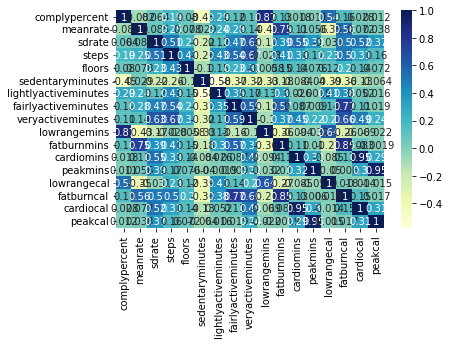

In [ ]:
corr_matrix=df3.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

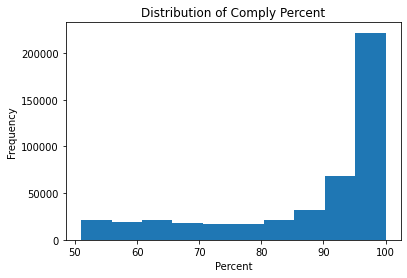

In [ ]:
comply = df3['complypercent']
plt.hist(comply)
plt.title("Distribution of Comply Percent")
plt.ylabel('Frequency')
plt.xlabel('Percent')
plt.show()

Text(0, 0.5, 'Value')

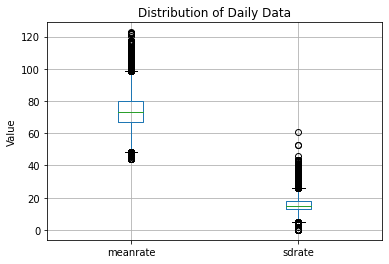

In [ ]:
boxplot_rate = df3.boxplot(column=['meanrate','sdrate'])
plt.title('Distribution of Daily Data')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

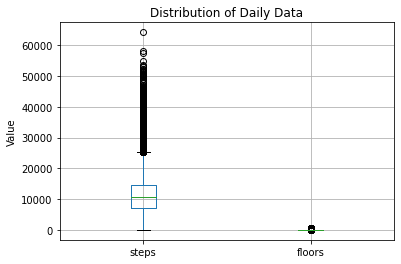

In [ ]:
boxplot_steps = df3.boxplot(column=['steps','floors'])
plt.title('Distribution of Daily Data')
plt.ylabel('Value')

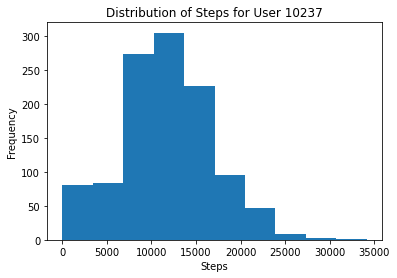

In [ ]:
data = df3[df3['egoid']==10237]
plt.hist(data['steps'])
plt.title("Distribution of Steps for User 10237")
plt.xlabel("Steps")
plt.ylabel("Frequency")
plt.show()

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

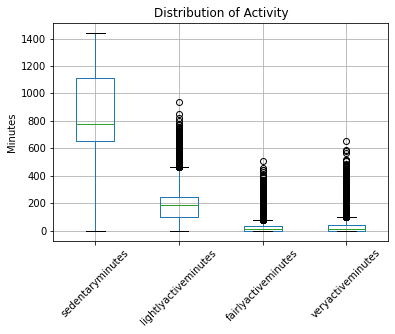

In [ ]:
boxplot_activity = df3.boxplot(column=['sedentaryminutes','lightlyactiveminutes','fairlyactiveminutes','veryactiveminutes'])
plt.title("Distribution of Activity")
plt.ylabel('Minutes')
plt.xticks(rotation=45)

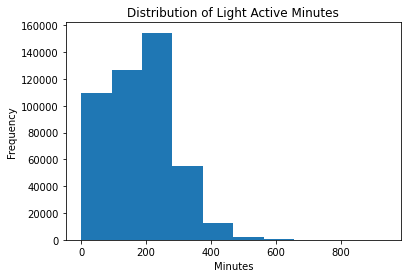

In [ ]:
active = df3['lightlyactiveminutes']
plt.hist(active)
plt.title("Distribution of Light Active Minutes")
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

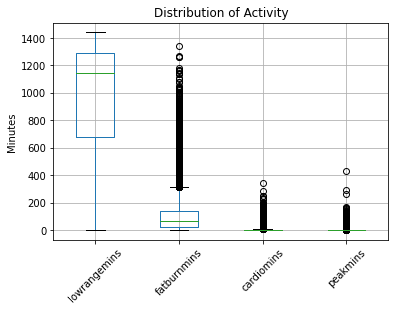

In [ ]:
boxplot_min= df3.boxplot(column=['lowrangemins','fatburnmins','cardiomins','peakmins'])
plt.title("Distribution of Activity")
plt.ylabel('Minutes')
plt.xticks(rotation=45)

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

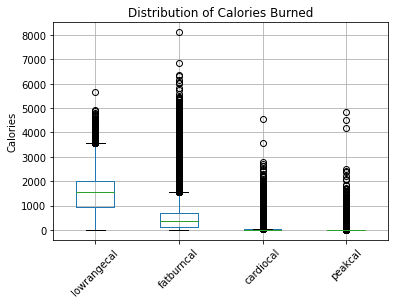

In [ ]:
boxplot_cal = df3.boxplot(column=['lowrangecal','fatburncal','cardiocal','peakcal'])
plt.title("Distribution of Calories Burned")
plt.ylabel('Calories')
plt.xticks(rotation=45)

In [ ]:
# Final cleaned activity dataset
df_activity = df3.copy()
df_activity = df_activity.drop(['lowrangecal', 'fatburncal','cardiocal','peakcal'], axis=1) 
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45875 entries, 2015-08-01 to 2016-08-01
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   egoid                 45875 non-null  object  
 1   complypercent         45875 non-null  float64 
 2   meanrate              45875 non-null  float64 
 3   sdrate                45875 non-null  float64 
 4   steps                 45875 non-null  float64 
 5   floors                45875 non-null  float64 
 6   sedentaryminutes      45875 non-null  float64 
 7   lightlyactiveminutes  45875 non-null  float64 
 8   fairlyactiveminutes   45875 non-null  float64 
 9   veryactiveminutes     45875 non-null  float64 
 10  lowrangemins          45875 non-null  float64 
 11  fatburnmins           45875 non-null  float64 
 12  cardiomins            45875 non-null  float64 
 13  peakmins              45875 non-null  float64 
 14  month                 45875 non-null 

In [ ]:
# there are 0 individuals who on avergae, have a compliance score less than 75%

comply = df_activity.groupby('egoid').mean()
lowcomply = comply[comply.complypercent < 75]
lst = list(lowcomply.index)
print(len(lst))
# for id in lst:
  # df_activity = df_activity[df_activity.egoid != id]

0


## **Sleep Dataset Analysis**

In [ ]:
path_sleep = '/content/drive/My Drive/MRP/FitbitSleep.csv'
df_sleep = pd.read_csv(path_sleep)
df_sleep

,egoid,dataDate,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
0,44869,2015-07-28,6:25:00,10:27:00,243,0,0,232,11,0.954733
1,44869,2015-07-29,3:26:30,7:21:30,236,1,4,216,15,0.935065
2,44869,2015-07-29,12:03:30,16:44:30,282,3,0,267,12,0.956989
3,44869,2015-07-30,6:27:30,14:31:30,485,4,0,451,30,0.937630
4,44869,2015-07-31,4:40:30,6:27:30,108,0,0,100,8,0.925926
...,...,...,...,...,...,...,...,...,...,...
333703,35925,2017-11-13,23:45:00,9:15:00,571,0,0,533,38,0.933450
333704,35925,2017-11-16,23:16:30,8:20:30,545,0,1,489,55,0.898897
333705,35925,2017-11-26,4:19:00,8:43:00,265,6,1,249,9,0.965116
333706,35925,2017-12-17,17:55:30,19:11:30,77,2,3,70,2,0.972222


In [ ]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333708 entries, 0 to 333707
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   egoid             333708 non-null  int64  
 1   dataDate          333708 non-null  object 
 2   timetobed         333708 non-null  object 
 3   timeoutofbed      333706 non-null  object 
 4   bedtimedur        333708 non-null  int64  
 5   minstofallasleep  333708 non-null  int64  
 6   minsafterwakeup   333708 non-null  int64  
 7   minsasleep        333708 non-null  int64  
 8   minsawake         333708 non-null  int64  
 9   Efficiency        333708 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 25.5+ MB


In [ ]:
# keep same ids as those in df_activity dataframe 
ids = df_activity['egoid'].value_counts().index.to_list()
ids = list(map(int, ids))

In [ ]:
df_sleep2 = pd.DataFrame()

for i in ids:
  temp = df_sleep[df_sleep.egoid == i]
  df_sleep2 = df_sleep2.append(temp)

In [ ]:
df_sleep2

,egoid,dataDate,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
38771,67918,2015-07-26,23:26:00,1:13:00,108,0,0,92,16,0.851852
38772,67918,2015-07-26,3:48:30,8:35:30,288,0,0,286,2,0.993056
38773,67918,2015-07-27,22:56:00,7:40:00,525,2,0,505,18,0.965583
38774,67918,2015-07-28,22:52:00,8:51:00,600,6,0,569,25,0.957912
38775,67918,2015-07-29,22:51:00,8:42:00,592,0,3,543,46,0.921902
...,...,...,...,...,...,...,...,...,...,...
303578,36501,2016-09-05,0:58:30,10:09:30,552,0,0,509,43,0.922101
303579,36501,2016-09-06,2:44:30,12:01:30,558,0,0,496,62,0.888889
303580,36501,2016-09-07,5:14:30,10:25:30,312,0,0,291,21,0.932692
303581,36501,2016-09-08,1:10:30,10:41:30,572,0,0,512,60,0.895105


In [ ]:
ids_s = df_sleep2['egoid'].value_counts().index.to_list()
sorted(ids) == sorted(ids_s)

True

In [ ]:
df_sleep2['dataDate'] = pd.to_datetime(df_sleep2['dataDate'])
df_sleep2 = df_sleep2.rename(columns={'dataDate': 'date'})

In [ ]:
df_sleep2 = df_sleep2[(df_sleep2['date'] >= '2015-07-31') & (df_sleep2['date'] <= '2016-08-01')]

# c = df_sleep.groupby('egoid').nunique()
# c = c['date']
# c = c.reset_index()
# days = dict(zip(c.egoid, c.date))

# remove_id = []
# count=0
# for key in days:
#   # print(key, days[key])
#   if days[key] > 300:
#     count +=1
#   else:
#     remove_id.append(key)
# print(count)

# for id in remove_id:
#   df_sleep = df_sleep[df_sleep.egoid != id]

In [ ]:
df_sleep2

,egoid,date,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
38777,67918,2015-08-01,23:53:00,9:00:00,548,5,0,495,48,0.911602
38778,67918,2015-08-03,0:05:30,9:42:30,578,3,0,538,37,0.935652
38779,67918,2015-08-05,23:13:00,9:00:00,588,2,0,547,39,0.933447
38780,67918,2015-08-06,23:33:30,9:32:30,600,5,1,552,42,0.929293
38781,67918,2015-08-07,22:42:30,9:12:30,631,0,0,595,36,0.942948
...,...,...,...,...,...,...,...,...,...,...
303551,36501,2016-07-28,23:31:30,9:26:30,596,0,0,538,58,0.902685
303552,36501,2016-07-29,0:54:00,10:27:00,574,1,0,553,20,0.965096
303553,36501,2016-07-30,2:15:30,10:19:30,485,5,0,449,31,0.935417
303554,36501,2016-07-31,1:58:30,9:54:30,477,20,0,434,23,0.949672


In [ ]:
# can have multiple sleep periods for a given day. Only keeping first sleep record
temp = df_sleep[df_sleep.egoid==22455]
temp.head(20)

,egoid,date,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
241183,22455,2015-08-11,0:14:30,6:30:30,377,3,1,357,16,0.957105
241184,22455,2015-08-12,19:30:00,5:31:00,602,4,0,566,32,0.946488
241185,22455,2015-08-12,14:08:30,15:11:30,64,2,0,58,4,0.935484
241186,22455,2015-08-13,0:15:30,7:19:30,425,3,0,385,37,0.912322
241187,22455,2015-08-14,23:27:30,6:39:30,433,3,0,403,27,0.937209
241188,22455,2015-08-14,18:18:00,22:05:00,228,6,5,207,10,0.953917
241189,22455,2015-08-15,0:50:30,5:42:30,293,0,0,274,19,0.935154
241190,22455,2015-08-15,19:51:30,23:08:30,198,2,7,182,7,0.962963
241191,22455,2015-08-16,2:21:00,6:18:00,238,7,0,219,12,0.948052
241192,22455,2015-08-17,23:21:00,7:11:00,471,8,0,426,37,0.920086


In [ ]:
df_sleep.isnull().sum()

egoid               0
date                0
timetobed           0
timeoutofbed        0
bedtimedur          0
minstofallasleep    0
minsafterwakeup     0
minsasleep          0
minsawake           0
Efficiency          0
dtype: int64

In [ ]:
df_sleep2.groupby('egoid').nunique()

,date,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
egoid,,,,,,,,,
11002,324,270,264,256,15,13,239,55,333
11402,300,358,345,296,12,11,270,64,375
14279,346,247,237,201,18,15,198,69,353
14571,320,259,255,204,20,13,189,63,322
14737,339,333,335,277,15,15,267,70,377
...,...,...,...,...,...,...,...,...,...
98117,323,365,364,302,15,15,297,57,379
98462,278,247,237,216,13,14,219,59,303
98760,314,258,273,241,12,14,219,69,328


In [ ]:
df_sleep2

,egoid,date,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
38777,67918,2015-08-01,23:53:00,9:00:00,548,5,0,495,48,0.911602
38778,67918,2015-08-03,0:05:30,9:42:30,578,3,0,538,37,0.935652
38779,67918,2015-08-05,23:13:00,9:00:00,588,2,0,547,39,0.933447
38780,67918,2015-08-06,23:33:30,9:32:30,600,5,1,552,42,0.929293
38781,67918,2015-08-07,22:42:30,9:12:30,631,0,0,595,36,0.942948
...,...,...,...,...,...,...,...,...,...,...
303551,36501,2016-07-28,23:31:30,9:26:30,596,0,0,538,58,0.902685
303552,36501,2016-07-29,0:54:00,10:27:00,574,1,0,553,20,0.965096
303553,36501,2016-07-30,2:15:30,10:19:30,485,5,0,449,31,0.935417
303554,36501,2016-07-31,1:58:30,9:54:30,477,20,0,434,23,0.949672


In [ ]:
df_sleep3 = df_sleep2.copy()
df_sleep3 = df_sleep3.set_index(['date'])

ids_sleep = df_sleep3['egoid'].value_counts().index.to_list()

df_sleep4 = pd.DataFrame()
for i in ids_sleep:
  temp = df_sleep3[df_sleep3.egoid==i]
  # if (temp.index.is_unique == False):
  temp = temp.reset_index() # makes date column part of your data
  temp = temp.drop_duplicates('date',keep='first').set_index('date')
  new_date_range = pd.date_range(start="2015-07-31", end="2016-08-01", freq="D")
  temp = temp.reindex(new_date_range, fill_value= pd.NA)
  temp = temp.fillna(method='ffill')  
  
  # temp = temp.resample('D').ffill()
  temp = temp.fillna(temp.mean())
  df_sleep4 = df_sleep4.append(temp)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [ ]:
df_sleep4

,egoid,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
2015-07-31,91551.0,NaN,NaN,320.922222,2.566667,1.033333,286.208333,31.113889,0.909096
2015-08-01,91551.0,NaN,NaN,320.922222,2.566667,1.033333,286.208333,31.113889,0.909096
2015-08-02,91551.0,NaN,NaN,320.922222,2.566667,1.033333,286.208333,31.113889,0.909096
2015-08-03,91551.0,NaN,NaN,320.922222,2.566667,1.033333,286.208333,31.113889,0.909096
2015-08-04,91551.0,NaN,NaN,320.922222,2.566667,1.033333,286.208333,31.113889,0.909096
...,...,...,...,...,...,...,...,...,...
2016-07-28,89607.0,23:34:00,8:10:00,517.000000,1.000000,0.000000,438.000000,78.000000,0.848837
2016-07-29,89607.0,0:08:00,9:19:00,552.000000,4.000000,4.000000,485.000000,59.000000,0.891544
2016-07-30,89607.0,0:03:00,9:34:00,572.000000,3.000000,0.000000,486.000000,83.000000,0.854130
2016-07-31,89607.0,23:20:00,7:20:00,481.000000,7.000000,0.000000,403.000000,71.000000,0.850211


In [ ]:
df_sleep4.groupby('egoid').nunique()

,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
egoid,,,,,,,,
11002.0,242,243,230,15,13,217,54,311
11402.0,253,255,227,12,11,211,64,291
14279.0,228,223,185,18,15,182,66,335
14571.0,234,233,184,20,13,170,63,304
14737.0,273,279,243,15,15,232,70,325
...,...,...,...,...,...,...,...,...
98117.0,285,290,243,15,15,242,55,308
98462.0,212,210,190,13,14,194,57,270
98760.0,226,243,211,12,14,189,67,302


In [ ]:
df_sleep4.nunique()

egoid                 125
timetobed            1872
timeoutofbed         2124
bedtimedur            802
minstofallasleep       74
minsafterwakeup        67
minsasleep            767
minsawake             289
Efficiency          13318
dtype: int64

In [ ]:
df_sleep4.isnull().sum()

egoid                  0
timetobed           1166
timeoutofbed        1166
bedtimedur             0
minstofallasleep       0
minsafterwakeup        0
minsasleep             0
minsawake              0
Efficiency             0
dtype: int64

In [ ]:
a = df_sleep4['Efficiency']
df_sleep4['class'] = [1 if 0<x<=0.2 else 2 if 0.2<x<=0.4 else 3 if 0.4<x<=0.6 else 4 if 0.6<x<=0.8 else 5 if 0.8<x<=1 else x for x in a]
df_sleep4['class'].value_counts()

5    45426
3      338
4      179
2       52
1        5
Name: class, dtype: int64

In [ ]:
df_sleep4['class'] = df_sleep4['class'].astype('category')

In [ ]:
df_sleep4['egoid'] = df_sleep4['egoid'].astype('object')

In [ ]:
means_for_categories = df_sleep4.groupby('class').mean()
means_for_categories
# means_for_categories.drop('egoid', axis=1)

,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
class,,,,,,
1,381.800000,9.400000,17.800000,50.800000,303.800000,0.140328
2,464.211538,6.596154,10.365385,165.038462,282.211538,0.362351
3,416.142351,9.958434,11.183173,198.945371,196.055372,0.506170
4,362.463687,8.256983,8.698324,234.385475,111.122905,0.678416
5,429.866064,2.718590,0.960994,401.227408,24.959072,0.942532


In [ ]:
df_sleep4 = df_sleep4[df_sleep4.index != '2015-07-31']

In [ ]:
df_sleep4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45875 entries, 2015-08-01 to 2016-08-01
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   egoid             45875 non-null  object  
 1   timetobed         44809 non-null  object  
 2   timeoutofbed      44809 non-null  object  
 3   bedtimedur        45875 non-null  float64 
 4   minstofallasleep  45875 non-null  float64 
 5   minsafterwakeup   45875 non-null  float64 
 6   minsasleep        45875 non-null  float64 
 7   minsawake         45875 non-null  float64 
 8   Efficiency        45875 non-null  float64 
 9   class             45875 non-null  category
dtypes: category(1), float64(6), object(3)
memory usage: 3.5+ MB


In [ ]:
df_sleep4.describe()

,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
count,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000,45875.000000
mean,429.533496,2.798324,1.078639,398.783779,26.872753,0.937555
std,120.155704,4.440894,3.317256,114.238018,25.228934,0.056423
min,8.000000,0.000000,0.000000,1.000000,0.000000,0.062092
25%,369.000000,0.000000,0.000000,342.000000,13.000000,0.920869
50%,440.000000,2.000000,0.000000,410.000000,22.000000,0.946101
75%,506.000000,4.000000,1.000000,472.000000,35.000000,0.966518
max,1370.000000,189.000000,168.000000,990.000000,489.000000,1.000000


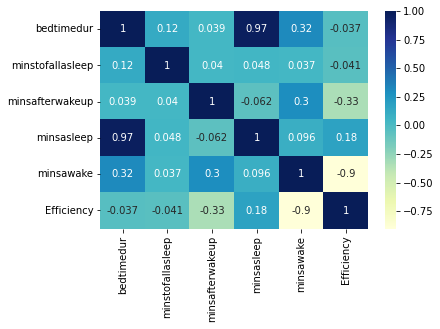

In [ ]:
corr_matrix=df_sleep3.corr()
sns.heatmap(corr_matrix,cmap='YlGnBu',annot=True)

Text(0, 0.5, 'Minutes')

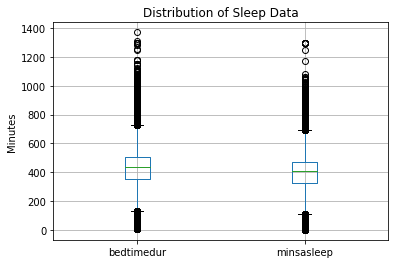

In [ ]:
boxplot = df_sleep3.boxplot(column=['bedtimedur','minsasleep'])
plt.title('Distribution of Sleep Data')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

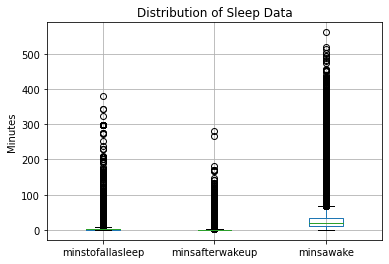

In [ ]:
boxplot2 = df_sleep3.boxplot(column=['minstofallasleep','minsafterwakeup','minsawake'])
plt.title('Distribution of Sleep Data')
plt.ylabel('Minutes')

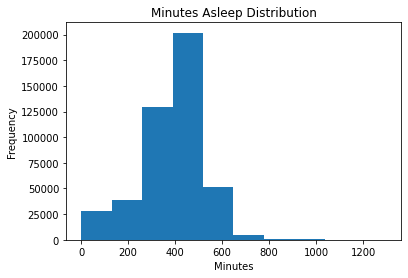

In [ ]:
sleep = df_sleep3['minsasleep']
plt.hist(sleep)
plt.title("Minutes Asleep Distribution")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**Merging the two datasets**

In [ ]:
# daily_ids = df_activity['egoid'].value_counts().index.to_list()
# sleep_ids = df_sleep3['egoid'].value_counts().index.to_list()

# missing_id = [item for item in daily_ids if item not in sleep_ids]
# print(missing_id)
# missing_id2 =  [item for item in sleep_ids if item not in daily_ids]
# print(missing_id2)

# remove egoid not present in sleep data collected
# for id in missing_id:
#   df_activity = df_activity[df_activity.egoid != id]

# for id in missing_id2:
#   df_sleep3 = df_sleep3[df_sleep3.egoid != id]

In [ ]:
# daily = df_activity['egoid'].value_counts().to_dict()
# sleep = df_sleep4['egoid'].value_counts().to_dict()
# daily.keys() == sleep.keys()

# remove_daily = []
# remove_sleep = []

# for key in daily:
#   if daily[key] < 180:
#     remove_daily.append(key)

# for key in sleep:
#   if sleep[key] < 180:
#     remove_sleep.append(key)


# remove_ids = list(set(remove_daily + remove_sleep))
# print(remove_ids)

# for id in remove_ids:
#   df_activity = df_activity[df_activity.egoid != id]
#   df_sleep3 = df_sleep3[df_sleep3.egoid != id]

# Some days reported are missing either daytime or sleep data
# joining the two tables will be an inner join, dropping rows that do not have complete data for a given day 
# print(len(df_activity))
# print(len(df_sleep4))

In [ ]:
df_activity = df_activity.rename_axis('date').reset_index()
df_sleep4 = df_sleep4.rename_axis('date').reset_index()

In [ ]:
df_all = df_activity.merge(df_sleep4, how='inner', on=["egoid","date"])
df_all

,date,egoid,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,...,weekday,timetobed,timeoutofbed,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency,class
0,2015-08-01,67918.0,97.0,80.455666,14.178942,11419.0,10.0,637.0,217.0,30.0,...,5,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
1,2015-08-02,67918.0,59.0,93.715698,10.107015,9042.0,10.0,1174.0,234.0,26.0,...,6,23:53:00,9:00:00,548.0,5.0,0.0,495.0,48.0,0.911602,5
2,2015-08-03,67918.0,97.0,77.604469,12.975431,6327.0,6.0,673.0,175.0,7.0,...,0,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
3,2015-08-04,67918.0,59.0,90.791718,13.081469,13092.0,18.0,1118.0,205.0,35.0,...,1,0:05:30,9:42:30,578.0,3.0,0.0,538.0,37.0,0.935652,5
4,2015-08-05,67918.0,100.0,79.504982,14.706803,12689.0,47.0,563.0,261.0,15.0,...,2,23:13:00,9:00:00,588.0,2.0,0.0,547.0,39.0,0.933447,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45870,2016-07-28,36501.0,98.0,50.556137,13.650418,5965.0,6.0,647.0,183.0,26.0,...,3,23:31:30,9:26:30,596.0,0.0,0.0,538.0,58.0,0.902685,5
45871,2016-07-29,36501.0,97.0,52.905212,13.897326,8814.0,34.0,586.0,244.0,18.0,...,4,0:54:00,10:27:00,574.0,1.0,0.0,553.0,20.0,0.965096,5
45872,2016-07-30,36501.0,96.0,49.838959,8.438036,4890.0,11.0,698.0,248.0,4.0,...,5,2:15:30,10:19:30,485.0,5.0,0.0,449.0,31.0,0.935417,5
45873,2016-07-31,36501.0,93.0,52.419224,15.835029,10229.0,7.0,618.0,225.0,14.0,...,6,1:58:30,9:54:30,477.0,20.0,0.0,434.0,23.0,0.949672,5


In [ ]:
df_all['egoid'].nunique()

125

In [ ]:
mean_categories = df_all.groupby('class').mean()
# mean_categories.drop('egoid', axis=1)
mean_categories

,complypercent,meanrate,sdrate,steps,floors,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,lowrangemins,fatburnmins,cardiomins,peakmins,bedtimedur,minstofallasleep,minsafterwakeup,minsasleep,minsawake,Efficiency
class,,,,,,,,,,,,,,,,,,,
1,96.800000,69.247148,14.770332,17337.000000,87.400000,827.000000,192.000000,18.000000,8.000000,1283.600000,100.200000,0.000000,0.000000,381.800000,9.400000,17.800000,50.800000,303.800000,0.140328
2,89.019231,71.475279,15.183762,11907.230769,24.750000,852.788462,174.750000,12.692308,27.365385,1180.653846,75.519231,11.346154,1.692308,464.211538,6.596154,10.365385,165.038462,282.211538,0.362351
3,92.280845,70.158323,13.358736,10573.812635,16.289690,774.104968,207.594064,15.401664,23.295649,1266.317726,54.023731,2.439550,0.998119,416.198983,9.967286,11.186814,198.908806,196.136077,0.505995
4,88.245810,71.720725,12.954721,9643.882682,16.513966,825.843575,214.162011,14.022346,17.776536,1198.871508,65.312849,1.067039,0.234637,362.463687,8.256983,8.698324,234.385475,111.122905,0.678416
5,92.551763,73.507144,15.627980,11904.318340,19.839428,715.781659,232.011836,27.264761,33.393471,1205.010714,114.371835,3.975688,0.972845,429.863164,2.718338,0.960832,401.226935,24.957059,0.942537


In [ ]:
df_all['class'].value_counts()

5    45302
3      337
4      179
2       52
1        5
Name: class, dtype: int64

In [ ]:
counts = df_all.groupby(['egoid','class']).size()
counts

egoid    class
11002.0  1          0
         2          0
         3          0
         4          0
         5        367
                 ... 
99733.0  1          0
         2          0
         3          0
         4          0
         5        367
Length: 625, dtype: int64

In [ ]:
with open('/content/drive/My Drive/MRP/FitbitClean.csv', 'w') as f:
  df_all.to_csv(f)